# Persistent English Auctions - Simulation

A sequential clearing auction mechanism inspired by English auctions for maximising bid transparency and revenue.

We consider the situation in which a NFT artist would like to sell a collection of NFTs. They do not know what would be a fair price and thus resort to an auction.

In a persistent English auction, the auctioneer decides the rate at which NFTs should be sold at e.g 1 NFT per hour. Whilst the auction is active, potential buyers can register bids. In theory, at the end of every hour (a clearing round), a sale is made to the highest bidder. This is done until all pieces are sold.

Lazy evaluation is used to amortise the cost of operating the auction on the blockchain. Before a bid is made, the time gap between the previous transaction is calculated to see if any previous clearing rounds need to be processed. This is inspired by the concept of virtual orders used in [TWAMMs](https://www.paradigm.xyz/2021/07/twamm#the-time-weighted-average-market-maker).

Upon auction close, participants can mint their NFTs and/or claim their funds from unsuccessful bids.

This notebook simulates the running of a persistent English auction due to the simple mechanism to choose the winner every clearing round.

## Dependencies

In [2]:
%pip install names

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Simulated Auction
from pea import PersistentEnglishAuction
from random import randint, uniform, triangular
import numpy as np
import names

# Plotting
import matplotlib.pyplot as plt

## Auction Setup

In [4]:
# Auction configuration presets
TIME_BETWEEN_CLEARING = 2
MAX_CLEARS = 10
AUCTION_START_TIME = 2
BIDS = 50

# Create a completely new auction
def new_auction(time_between_clearing = TIME_BETWEEN_CLEARING,
                max_clears = MAX_CLEARS,
                auction_start_time = AUCTION_START_TIME):
    return PersistentEnglishAuction(time_between_clearing=time_between_clearing,
                                   max_clears=max_clears,
                                   auction_start_time=auction_start_time)

def apply_bids(auction, x, y):
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    
    for i in range(len(x)):
        auction.add_bid(address=names.get_first_name(), bid=y[i], bid_time=x[i])
    auction.close_auction()

def plot_winnings(auction):
    bidders = auction.get_bidders()
    winners = auction.get_winners()
    all_bids = np.array([bid[0] for bid in (bidders + winners)])
    all_bids = all_bids[np.argsort(all_bids)]
    
    potential_max_revenue = sum([-bid for bid in all_bids[:MAX_CLEARS]])
    actual_max_revenue = sum([-winner[0] for winner in winners])

    print("Actual maximum revenue: ", actual_max_revenue)
    print("Potential maximum revenue: ", potential_max_revenue)

    plt.plot([bidder[1] for bidder in bidders], [(-bidder[0]) for bidder in bidders], 'o', color='black')
    plt.plot([winner[1] for winner in winners], [(-winner[0]) for winner in winners], 'o', color="orange")

## Simple Linear Generation

Actual maximum revenue:  839
Potential maximum revenue:  857


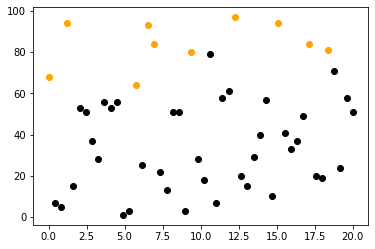

In [5]:
auction = new_auction()

# Generate random bids made in a linear fashion
x = np.linspace(0, TIME_BETWEEN_CLEARING * MAX_CLEARS, BIDS)
y = np.array([randint(1, 100) for num in x])

apply_bids(auction, x, y)
plot_winnings(auction)

## Randomised 2D Generation 

Actual maximum revenue:  889
Potential maximum revenue:  910


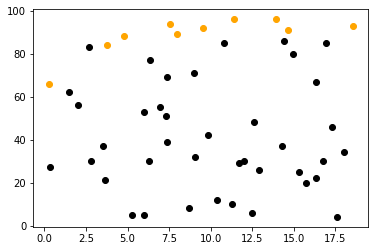

In [6]:
auction = new_auction()

# Generate random bids made in a 2D random fashion
x = np.array([uniform(0, TIME_BETWEEN_CLEARING * MAX_CLEARS) for _ in range(0, BIDS)])
y = np.array([randint(1, 100) for num in x])

apply_bids(auction, x, y)
plot_winnings(auction)

## Normal Auction Sniping

Actual maximum revenue:  919.0797392663625
Potential maximum revenue:  929.9913856216314


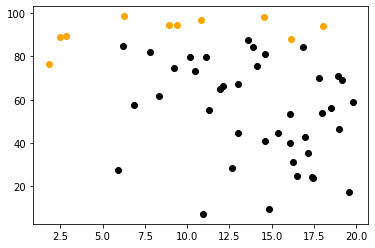

In [23]:
auction = new_auction()

# Generate random bids
x = np.array([triangular(0, TIME_BETWEEN_CLEARING * MAX_CLEARS, TIME_BETWEEN_CLEARING * MAX_CLEARS) for _ in range(0, BIDS)])
y = np.array([triangular(0, 100, 100) for num in x])

apply_bids(auction, x, y)
plot_winnings(auction)

## Attuned Auction Sniping

Actual maximum revenue:  957.5821212269644
Potential maximum revenue:  957.5821212269647


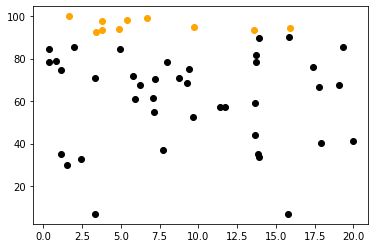

In [22]:
auction = new_auction()

# Generate random bids
x = np.array([[triangular(i * TIME_BETWEEN_CLEARING, (i + 1) * TIME_BETWEEN_CLEARING, (i + 1) * TIME_BETWEEN_CLEARING) for i in range(0, MAX_CLEARS)][randint(0, MAX_CLEARS - 1)] for _ in range(0, BIDS)])
y = np.array([triangular(0, 100, 100) for num in x])

apply_bids(auction, x, y)
plot_winnings(auction)